
# Master

## task 1:

### Take 10 perspective pictures of 5 personal objects (2 for each) and apply a perspective transformation so that it transforms into a top-view (See tutorial and cool iphone and macbook feature that does this). (very easy - 0.75p)

### my steps

1. first, I read the tutorial and noticed: A common example of a projective transformation is given by a perspective transformation. This means a perspective transformation is a kind of a projective transformation: $ perspective transformation \subset projective transformation$
2. As the task requires us to apply a perspective transformation, we need to apply a projective transformation which has been introduced in our lab notebook.
3. The exact task may be to find sequences of transformations to get a top-view of an object. And I need to know are there any additional requirements when taking photos. (from which angels, the distance(size of photos), etc.)

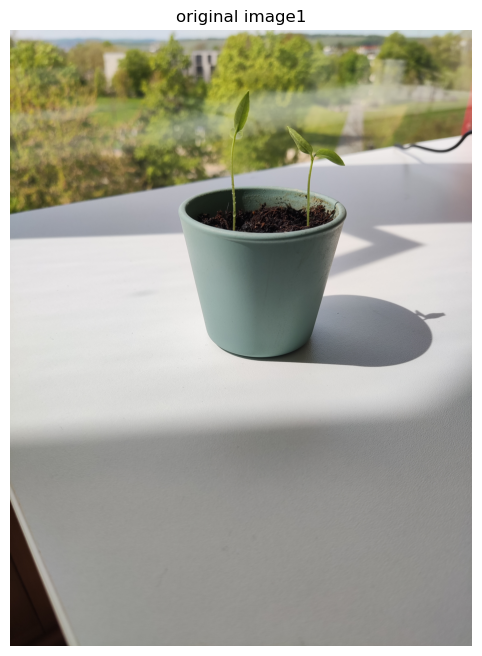

In [23]:
# deprecated since it cannot display the real image
# in short, the original pixel data in a sRGB file has been transformed(gamma-corrected), they need to be transformed again in order to display the exact image. since cv.imread just read the transformed data without transforming the data. We need to use other methods to display the exact image.
from os import path
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from IPython.core.pylabtools import figsize


def display_image(image, title='Image'):
    plt.figure(figsize=(8, 8))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

def perspective_transform_image(image, src_points, dst_points):
    M = cv.getPerspectiveTransform(src_points, dst_points)
    return cv.warpPerspective(image, M, (image.shape[1], image.shape[0]))

task1_dir = "Assets/task1"
task1_image1_name = "IMG_20250427_143946.jpg"


image1 = cv.imread(path.join(task1_dir, task1_image1_name), cv.IMREAD_COLOR)

display_image(image1, 'original image1')



Attempting to load image from: Assets/task1\IMG_20250427_162105.jpg
Image loaded successfully using Pillow.


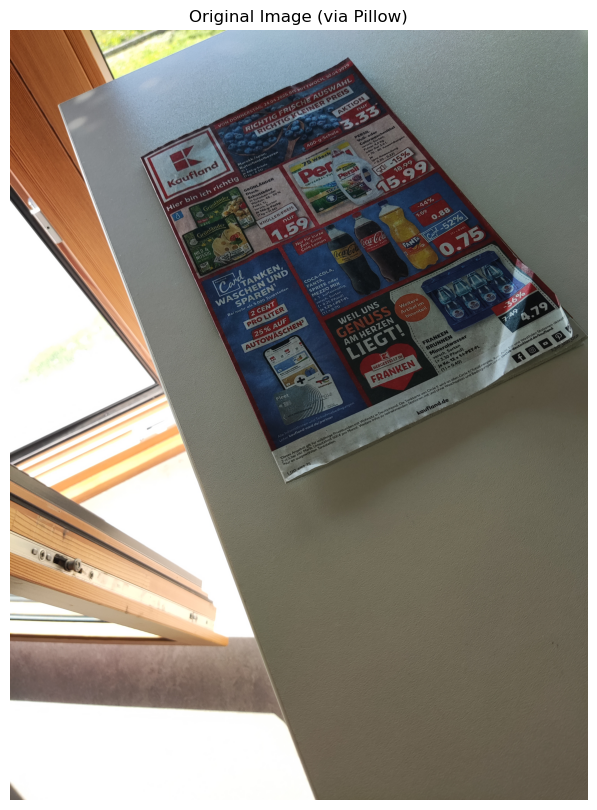

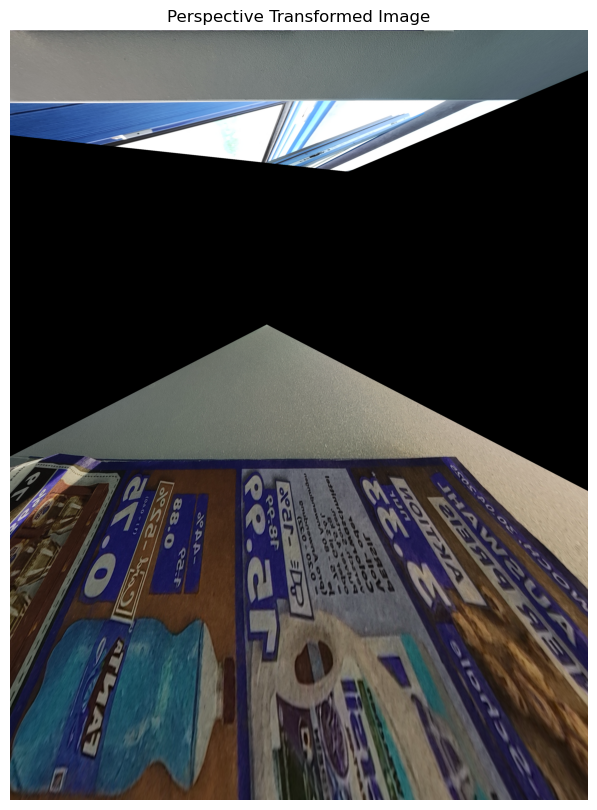

In [5]:
# task1 code
from os import path
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from PIL import Image, ImageOps


def perspective_transform_image(image_cv, src_points, dst_points):
    M = cv.getPerspectiveTransform(src_points, dst_points)
    height, width = image_cv.shape[:2]
    return cv.warpPerspective(image_cv, M, (width, height))

## code generated by Google aistudio: Gemini 2.5 Pro Preview 03-25
# I don't know how to display my photo taken by my phone which has sRGB color representation property
def display_image(image_np, title='Image'):
    """Displays a NumPy array image using Matplotlib."""
    if image_np is None:
        print("Cannot display None image.")
        return
    if image_np.ndim != 3 or image_np.shape[2] != 3:
        print(f"Image needs to be 3 channels (RGB) for display, but got shape {image_np.shape}")
        # Optionally try grayscale display:
        # plt.imshow(image_np, cmap='gray')
        return
    # Increased size slightly
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(image_np)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

## my own code
task1_dir = "Assets/task1"
task1_image1_name = "IMG_20250427_162105.jpg"
image_path = path.join(task1_dir, task1_image1_name)
print(f"Attempting to load image from: {image_path}")

## code generated by Google aistudio: Gemini 2.5 Pro Preview 03-25
try:
    img_pil = Image.open(image_path)
    img_pil = ImageOps.exif_transpose(img_pil)
    if img_pil.mode != 'RGB':
        print(f"Converting image mode from {img_pil.mode} to RGB")
        img_pil = img_pil.convert('RGB')
    image1_np_rgb = np.array(img_pil)

    print("Image loaded successfully using Pillow.")
    display_image(image1_np_rgb, 'Original Image (via Pillow)')

    image1 = cv.imread(image_path, cv.IMREAD_COLOR)

    ## code from lab1
    # left-top left-bottom right-top, right-bottom
    src_pts = np.float32([[676, 666], [1434, 2355], [1755,143], [2995, 1585]])
    output_width = 2311
    output_height = 2219
    dst_points = np.float32([
        [0, 0],
        [output_width - 1, 0],
        [output_width - 1, output_height - 1],
        [0, output_height - 1]
    ])

    perspective_transformed_image = perspective_transform_image(image1, src_pts, dst_points)
    display_image(perspective_transformed_image, 'Perspective Transformed Image')



except FileNotFoundError:
    print(f"Error: File not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")
